### Predict Sales

In [1]:
# Importing packages
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data
sales_data = pd.read_csv('advertising_and_sales_clean.csv')
sales_data.shape

(4546, 5)

In [5]:
def styled_dataframe(df):
    """
    Apply styling to a DataFrame for better visual aesthetics.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to style.

    Returns:
    - pd.DataFrame
        The styled DataFrame.
    """
    styled_df = df.style \
        .set_properties(**{'text-align': 'center'}) \
        .set_table_styles([{
            'selector': 'th',
            'props': [('font-size', '14px')]
        }, {
            'selector': 'td',
            'props': [('font-size', '12px')]
        }]) \
        .background_gradient(cmap='coolwarm', subset=df.select_dtypes('number').columns) \
        .applymap(lambda x: 'background-color: lightgray', subset=pd.IndexSlice[:, df.columns[df.isnull().any()]]) \
    
    return styled_df

In [9]:
# Display the head of the DataFrame
styled_dataframe(sales_data.head())

,tv,radio,social_media,influencer,sales
0,16000.000000,6566.230000,2907.980000,Mega,54732.760000
1,13000.000000,9237.760000,2409.570000,Mega,46677.900000
2,41000.000000,15886.450000,2913.410000,Mega,150177.830000
3,83000.000000,30020.030000,6922.300000,Mega,298246.340000
4,15000.000000,8437.410000,1406.000000,Micro,56594.180000


In [11]:
# Display a random sample from the DataFrame
styled_dataframe(sales_data.sample(5))

,tv,radio,social_media,influencer,sales
4430,91000.000000,27707.830000,3169.180000,Mega,326511.990000
3065,76000.000000,28887.380000,5953.680000,Micro,264664.140000
587,70000.000000,20267.130000,5456.290000,Mega,247439.030000
2416,100000.000000,31420.840000,2924.100000,Micro,357587.130000
1082,51000.000000,24646.880000,6444.050000,Micro,189498.470000


In [14]:
# Display the tail of the DataFrame
styled_dataframe(sales_data.tail())

,tv,radio,social_media,influencer,sales
4541,26000.000000,4472.360000,717.090000,Micro,94685.870000
4542,71000.000000,20610.690000,6545.570000,Nano,249101.920000
4543,44000.000000,19800.070000,5096.190000,Micro,163631.460000
4544,71000.000000,17534.640000,1940.870000,Macro,253610.410000
4545,42000.000000,15966.690000,5046.550000,Micro,148202.410000


In [15]:
def dataframe_summary(df):
    """
    Perform basic exploratory data analysis (EDA) on a Pandas DataFrame.

    Parameters:
    df (DataFrame): The DataFrame to analyze.

    Returns:
    dict: A dictionary containing various EDA statistics and information.
    """
    # Summary statistics
    summary_stats = df.describe()

    # Data types and missing values
    data_info = df.info()

    # Number of unique values in each column
    num_unique = df.nunique()

    # Check for missing values
    missing_values = df.isnull().sum()

    # Check for duplicated rows
    num_duplicates = df.duplicated().sum()

    # Basic histogram for numeric columns
    numeric_columns = df.select_dtypes(include=['number'])
    histograms = {}
    for column in numeric_columns.columns:
        histograms[column] = df[column].plot(kind='hist', title=column)
    
    # Create a dictionary to store the EDA results
    eda_results = {
        'Summary Statistics': summary_stats,
        'Data Types and Missing Values': data_info,
        'Number of Unique Values': num_unique,
        'Missing Values': missing_values,
        'Number of Duplicates': num_duplicates,
        'Histograms': histograms,
    }

    return eda_results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


{'Summary Statistics':                   tv         radio  social_media          sales
 count    4546.000000   4546.000000   4546.000000    4546.000000
 mean    54062.912451  18157.533110   3323.472829  192413.332112
 std     26104.941838   9663.259642   2211.253915   93019.873216
 min     10000.000000      0.680000      0.030000   31199.410000
 25%     32000.000000  10555.355000   1530.822500  112434.610000
 50%     53000.000000  17859.515000   3055.565000  188963.680000
 75%     77000.000000  25640.605000   4804.922500  272324.240000
 max    100000.000000  48871.160000  13981.660000  364079.750000,
 'Data Types and Missing Values': None,
 'Number of Unique Values': tv                91
 radio           4545
 social_media    4532
 influencer         4
 sales           4545
 dtype: int64,
 'Missing Values': tv              0
 radio           0
 social_media    0
 influencer      0
 sales           0
 dtype: int64,
 'Number of Duplicates': 0,
 'Histograms': {'tv': <AxesSubplot: title={'

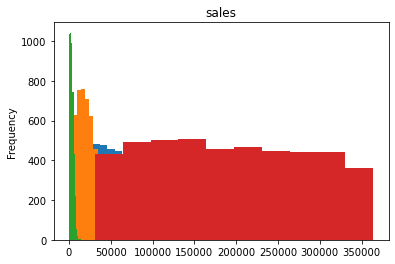

In [16]:
dataframe_summary(sales_data)

In [ ]:
sales_data.describe()

In [ ]:
def visualize_missing_data(df, height=None, width=None, heatmap=True, cmap='YlGnBu'):
    """
    Visualize missing data in a DataFrame, inspect categorical features, and provide insights.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to analyze.
    - height: int, optional
        The height of the figure for the heatmap. Default is None.
    - width: int, optional
        The width of the figure for the heatmap. Default is None.
    - heatmap: bool, optional
        Whether to display a heatmap of missing data. Default is True.

    Returns:
    - None
    """
    # Check for missing values
    missing_data = df.isnull()
    total_missing = missing_data.sum()
    percent_missing = (missing_data.sum() / len(df)) * 100

    # Create a summary DataFrame
    missing_info = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})
    missing_info = missing_info[missing_info['Total Missing'] > 0].sort_values(by='Percent Missing', ascending=False)

    # Display missing data info
    print("\033[1mMissing Data Information\033[0m")
    display(missing_info)

    # Analyze categorical features
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_features:
        print("\n\033[1mCategorical Feature Analysis\033[0m")
        for feature in categorical_features:
            unique_values = df[feature].unique()
            print(f"\n\033[1mFeature: {feature}\033[0m")
            print(f"Number of Unique Values: {len(unique_values)}")
            print("Unique Values:", unique_values)
            
            # Check for special characters in categorical data
            special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ';', ':', "'", '"', '<', '>', ',', '.', '?', '/', '~', '`']
            has_special_characters = any(df[feature].str.contains('|'.join(map(re.escape, special_characters)), na=False))
            if has_special_characters:
                print("\n\033[1mSpecial Characters Detected!\033[0m")
                print("Recommendation: Consider removing or replacing special characters.")
            else:
                print("\n\033[1mNo Special Characters Detected\033[0m")
                
            # Check for consistent binary values
            if len(unique_values) == 2:
                print("\n\033[1mBinary feature detected\033[0m.")
                print("Recommendation: Check if binary values are consistent (e.g., 'Yes'/'No', 'True'/'False').")
            else:
                print("\n\033[1mNo binary feature detected\033[0m.")
                
            # Check cardinality and provide recommendations
            if len(unique_values) < 10:
                print("\n\033[1mLow cardinality feature detected\033[0m.")
                print("Recommendation: Check for consistency and consider one-hot encoding.")
            else:
                print("\n\033[1mHigh cardinality feature detected\033[0m.")
                print("Recommendation: Review and possibly reduce cardinality through grouping or feature engineering.")
                
            # Check for inconsistent capitalization
            unique_values_lower = [value.lower() for value in unique_values if isinstance(value, str)]
            unique_values_lower_set = set(unique_values_lower)
            if len(unique_values_lower_set) != len(unique_values):
                print("Inconsistent Capitalization Detected!")
                print("Recommendation: Standardize capitalization (e.g., convert all values to lowercase).")

            # Check for redundant or similar categories
            def is_similar(value1, value2):
                return value1.lower().replace(" ", "") == value2.lower().replace(" ", "")

            similar_categories = []
            for i, value1 in enumerate(unique_values):
                for j, value2 in enumerate(unique_values):
                    if i != j and is_similar(str(value1), str(value2)):
                        similar_categories.append((value1, value2))
            if similar_categories:
                print("Redundant or Similar Categories Detected!")
                print("Recommendation: Consolidate similar categories into a single category.")
                print("Similar Category Pairs:")
                for pair in similar_categories:
                    print(pair)
                
    # Check numerical features for non-numeric entries
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    if numerical_features:
        print("\n\033[1mNumerical Feature Analysis\033[0m")
        for feature in numerical_features:
            if df[feature].apply(lambda x: isinstance(x, (int, float))).all():
                print(f"\n\033[1mFeature: {feature}\033[0m")
                print("All entries are numeric.")
            else:
                print(f"\n\033[1mFeature: {feature}\033[0m")
                print("Non-numeric entries detected.")
                print("Recommendation: Check and clean non-numeric entries if necessary.")
                
    # Create and display a heatmap
    if heatmap:
        if height and width:
            plt.figure(figsize=(width, height))
        elif height:
            plt.figure(figsize=(6, height))
        elif width:
            plt.figure(figsize=(width, 6))
        else:
            plt.figure()
        sns.heatmap(missing_data, cbar=False, cmap=cmap)
        plt.title('Missing Data Heatmap', fontsize=12)
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()

In [ ]:
visualize_missing_data(sales_data, height=2, width=6)

In [ ]:
def missing_data_heatmap(dataframe, figsize=(10, 6)):
    # Create a DataFrame to represent missing values (True for missing, False for not missing)
    missing_data = dataframe.isnull()

    # Create a heatmap of missing data
    plt.figure(figsize=figsize)
    sns.heatmap(missing_data, cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

In [ ]:
missing_data_heatmap(sales_data)

In [ ]:
# Visualizing the distribution of each numerical column
sns.pairplot(sales_data, hue="influencer")
plt.show()

In [ ]:
def correlation_heatmap(dataframe, cmap='YlGnBu', figsize_width=6, figsize_height=3):
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(figsize_width, figsize_height))
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

In [ ]:
# Visualizing the correlation between variables
correlation_heatmap(sales_data)

In [ ]:
def bar_charts(dataframe, categorical_columns=None, hue=None, subplot_height=3, subplot_width=4, plots_per_row=2):
    # If categorical_columns is None, get categorical columns from the DataFrame
    if categorical_columns is None:
        categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()

    # Calculate the number of rows needed for the subplots
    num_rows = len(categorical_columns) // plots_per_row + (len(categorical_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each categorical column and create a bar chart
    for i, col in enumerate(categorical_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index

        # Plot bar chart
        if hue:
            sns.countplot(data=dataframe, x=col, hue=hue, ax=axes[row, col_num])
        else:
            sns.countplot(data=dataframe, x=col, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Bar Chart: {col}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel('Count')

    # Remove empty subplots if the number of plots is odd
    if len(categorical_columns) % plots_per_row != 0:
        for j in range(len(categorical_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

In [ ]:
bar_charts(sales_data, hue='influencer', plots_per_row=2)

In [ ]:
def histogram_plots(dataframe, numeric_columns=None, kde=False, subplot_height=2, subplot_width=4, plots_per_row=2):
    # If numeric_columns is None, get the numeric columns in the DataFrame
    if numeric_columns is None:
        numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

    # Calculate summary statistics for numeric columns
    summary_stats = dataframe[numeric_columns].describe()

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * (subplot_height + 2)  # Add extra height for summary statistics

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each numeric column and create a histogram with or without KDE
    for i, col in enumerate(numeric_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index
        
        # Plot histogram with optional KDE
        sns.histplot(data=dataframe, x=col, kde=kde, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Histogram: {col}')
        axes[row, col_num].set_xlabel(col)
        if kde:
            axes[row, col_num].set_ylabel('Density')
        else:
            axes[row, col_num].set_ylabel('Count')
        
        # Display summary statistics as text
        summary_text = summary_stats[col].to_string(index=False)
        axes[row, col_num].annotate(summary_text, xy=(0.7, 0.85), xycoords='axes fraction')

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % plots_per_row != 0:
        for j in range(len(numeric_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

In [ ]:
histogram_plots(sales_data, kde=True, subplot_height=2, subplot_width=5, plots_per_row=3)

In [ ]:
def count_plots(dataframe, categorical_columns=None, subplot_height=3, subplot_width=4, plots_per_row=2):
    # If categorical_columns is None, get the categorical columns in the DataFrame
    if categorical_columns is None:
        categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()

    # Calculate the number of rows needed for the subplots
    num_rows = len(categorical_columns) // plots_per_row + (len(categorical_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each categorical column and create a count plot
    for i, col in enumerate(categorical_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index

        # Plot count plot
        sns.countplot(data=dataframe, x=col, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Count Plot: {col}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel('Count')

    # Remove empty subplots if the number of plots is odd
    if len(categorical_columns) % plots_per_row != 0:
        for j in range(len(categorical_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

In [ ]:
count_plots(sales_data, plots_per_row=3)

In [ ]:
def scatter_plots_with_target(
    dataframe, 
    target_column,
    numeric_columns=None,
    hue=None, 
    subplot_height=3, 
    subplot_width=6, 
    plots_per_row=2
):
    # If numeric_columns is None, get the numeric columns in the DataFrame excluding the target column
    if numeric_columns is None:
        numeric_columns = [col for col in dataframe.columns if col != target_column 
                           and np.issubdtype(dataframe[col].dtype, np.number)]

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, 
                             figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each numeric column and create a scatter plot with the target
    for i, col in enumerate(numeric_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index
        if hue:
            sns.scatterplot(data=dataframe, x=col, y=target_column, hue=hue, ax=axes[row, col_num])
        else:
            sns.scatterplot(data=dataframe, x=col, y=target_column, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Scatter Plot: {col} vs. {target_column}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel(target_column)

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % plots_per_row != 0:
        for j in range(len(numeric_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

In [ ]:
# Sales vs. TV, Radio, Social Media
scatter_plots_with_target(sales_data, target_column='sales', plots_per_row=3)

#### Handle Outlier 

In [ ]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [ ]:
# Get the numeric columns in the DataFrame
numeric_columns = sales_data.select_dtypes(include=[np.number]).columns

In [ ]:
# Create a dictionary to store outliers for each numeric column
outliers_dict = {}

In [ ]:
# Loop through each numeric column and detect outliers
for col in numeric_columns:
    outliers_mask = detect_outliers_iqr(sales_data[col])
    outliers = sales_data[outliers_mask]
    outliers_dict[col] = outliers

In [ ]:
# Print the rows with outliers for each numeric column
for col, outliers in outliers_dict.items():
    print("Rows with outliers in the column:", col)
    print(outliers)

In [ ]:
def create_box_plots(dataframe, numeric_columns=None, subplot_height=3, subplot_width=10, plots_per_row=2):
    # If numeric_columns is None, get the numeric columns in the DataFrame
    if numeric_columns is None:
        numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Calculate the number of columns based on the specified plots_per_row
    num_cols = min(plots_per_row, len(numeric_columns))

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_width * num_cols, fig_height))

    # Loop through each numeric column and create a box plot
    for i, col in enumerate(numeric_columns):
        row = i // num_cols  # Calculate the row index
        col_num = i % num_cols  # Calculate the column index
        sns.boxplot(data=dataframe, x=col, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Box Plot of {col}')
        axes[row, col_num].set_xlabel(col)

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % num_cols != 0:
        for j in range(len(numeric_columns) % num_cols, num_cols):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

In [ ]:
create_box_plots(dataframe=sales_data, plots_per_row=2)

In [ ]:
def stacked_bar_charts(dataframe, categorical_columns=None, hue=None, subplot_height=6, subplot_width=6, plots_per_row=2):
    # If categorical_columns is None, get categorical columns from the DataFrame
    if categorical_columns is None:
        categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()

    # Calculate the number of rows needed for the subplots
    num_rows = len(categorical_columns) // plots_per_row + (len(categorical_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each categorical column and create a stacked bar chart
    for i, col in enumerate(categorical_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index

        # Create a pivot table for the stacked bar chart
        pivot_table = dataframe.pivot_table(index=col, columns=hue, aggfunc='size', fill_value=0)
        
        # Plot stacked bar chart
        pivot_table.plot(kind='bar', stacked=True, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Stacked Bar Chart: {col}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel('Count')

    # Remove empty subplots if the number of plots is odd
    if len(categorical_columns) % plots_per_row != 0:
        for j in range(len(categorical_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

In [ ]:
# stacked_bar_charts(sales_data, categorical_columns=['influencer'], hue='social_media', plots_per_row=2)

In [ ]:
from IPython.display import display

In [ ]:
def display_dataframe(df, title="DataFrame Preview", head_rows=5, sample_rows=5, tail_rows=5):
    """
    Display the head, sample, and tail of a DataFrame with good visual aesthetics.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to display.
    - title: str, optional
        Title to display above the DataFrame. Default is "DataFrame Preview".
    - head_rows: int, optional
        Number of rows to display from the head of the DataFrame. Default is 5.
    - sample_rows: int, optional
        Number of random rows to display as a sample from the DataFrame. Default is 5.
    - tail_rows: int, optional
        Number of rows to display from the tail of the DataFrame. Default is 5.

    Returns:
    - None
    """
    print(f"\033[1m{title}\033[0m")
    
    # Display the head of the DataFrame
    display(df.head(head_rows))
    
    # Display a random sample from the DataFrame
    if sample_rows > 0:
        sample_df = df.sample(min(sample_rows, len(df)))
        print("\n\033[1mSample Data\033[0m")
        display(sample_df)
    
    # Display the tail of the DataFrame
    display(df.tail(tail_rows))

In [ ]:
# Example usage:
# df = pd.read_csv('your_data.csv')
display_dataframe(sales_data, title="Exploratory Data Analysis")